In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
data = pd.read_csv('Target_data_preprocessed.csv')

In [4]:
# from the dataset paper https://www.nature.com/articles/s41597-022-01779-4/tables/2

seed_scFv = {
    '14': 'EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPEWVSVIYSDGRRTFYGDSVKGRFTISRDTSTNTVYLQMNSLRVEDTAVYYCAKGRAAGTFDSWGQGTLVTVSSGGGGSGGGGSGGGGSDVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKAGQPPKLLIYWASTRESGVPDRFSGSGSGTDFTLTISSLQAEDAAVYYCQQYHRLPLSFGGGTKVEIK',
    '91': 'EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLEWVSGISWNSGSIGYADSVKGRFTISRDNAENSLYLQMNSLRAEDTALYYCAKVGRGGGYFDYWGQGTLVTVSSGGGGSGGGGSGGGGSQAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPPQYLLRYKSDSDKQQGSGVPSRFSGSKDASANAGILLISGLQSEDEADYYCMIWHSSAWVFGGGTKLTVL',
    '95': 'EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLEWMGWISAYNGNTNYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTAVYYCARVGRGVIDHWGQGTLVTVSSGGGGSGGGGSGGGGSSSELTQDPAVSVALGQTVRITCEGDSLRYYYANWYQQKPGQAPILVIYGKNNRPSGIADRFSGSNSGDTSSLIITGAQAEDEADYYCSSRDSSGFQVFFGAGTKLTVL'
    }


In [5]:
def find_num_mutation(str1):
    arr1 = np.array(list(str1))
    seed, n_mut, mut_sites = None, None, None
    for key in seed_scFv.keys():
        if len(str1) == len(seed_scFv[key]):
            arr2 = np.array(list(seed_scFv[key]))
            unmatched_indices = np.where(arr1 != arr2)[0]
            seed, n_mut, mut_sites = key, len(unmatched_indices), unmatched_indices
    return seed, n_mut, mut_sites

def get_aff_cls(x):
    if x < 1.69:
        return 1
    elif x < 4.35:
        return 2
    else:
        return 3
data['affinity_class'] = data.apply(lambda x: get_aff_cls(x['Pred_affinity']), axis=1)
data[['seed_antibody', 'num_mutation', 'mut_sites']] = data['Sequence'].apply(lambda x: pd.Series(find_num_mutation(x)))


In [6]:
data.to_csv('data_with_labels.csv', index=False)


In [11]:
df = pd.read_csv('data_with_labels.csv') 

In [12]:
df

,POI,Sequence,HC,LC,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3,Target,Pred_affinity,affinity_class,seed_antibody,num_mutation,mut_sites
0,AAYL50_1332,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCHSSQSVGYESRMKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,HSSQSVGYESRMKNSVA,WASTRES,QQYHRLPLS,MIT_Target,0.908478,1,14,3,[156 162 167]
1,AAYL50_20866,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKVSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKVSVA,HANTRES,QQYHRLPLS,MIT_Target,1.450543,1,14,3,[169 188 190]
2,AAYL49_28,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,NFTLQSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVLYESRNKNSVA,WASTRES,QQYHRLPLS,MIT_Target,1.793557,2,14,2,[25 29]
3,AAYL50_13317,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVGYESRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSQSVGYESRNKNSVA,VASTRAS,QQYHRLPLS,MIT_Target,1.762153,2,14,3,[162 188 193]
4,AAYL50_7657,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSESVLYQSRNKNSVAWYQQKA...,GFTLNSYGIS,VIYSDGRRTFYGDSVK,GRAAGTFDS,KSSESVLYQSRNKNSVA,WASTRES,QAYHRLPLS,MIT_Target,1.625471,1,14,3,[159 164 228]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71829,AAYL51_4423,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSLK,VGRGFGYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,3.673940,2,91,215,[ 0 1 2 4 5 6 7 8 9 10 11 ...
71830,AAYL51_4447,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSTK,VGRGGGYQDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,4.815116,3,91,215,[ 0 1 2 4 5 6 7 8 9 10 11 ...
71831,AAYL51_4438,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADSPK,VGRGGGQFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,4.130840,2,91,215,[ 0 1 2 4 5 6 7 8 9 10 11 ...
71832,AAYL51_444,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,GFTFDDYAMH,GISWNSGSIGYADGVK,VGRGGGYFDY,TLRSGINVGTYRIY,YKSDSDKQQGSGV,MIWHSSAWV,MIT_Target,3.807780,2,91,215,[ 0 1 2 4 5 6 7 8 9 10 11 ...


/var/folders/tg/f0jwz81x22s5z6lnwt1nxtn00000gp/T/ipykernel_4733/448081273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pred_affinity'])


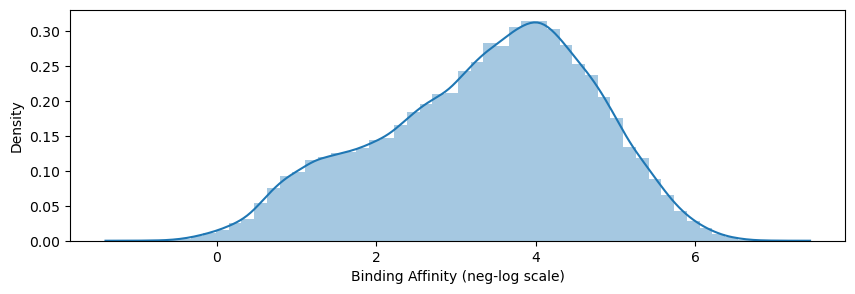

In [9]:
plt.figure(figsize=(10,3))
sns.distplot(df['Pred_affinity'])
plt.xlabel('Binding Affinity (neg-log scale)') 
plt.show() 

In [6]:
seed_affinity = {
    14: 0.784029,
    91: 1.020438,
    95: 1.834988, 
}


In [8]:
def get_improve_cls(x, seed):
    if x < seed_affinity[seed]:
        return 1
    else:
        return 0

In [9]:
df['improve_binding'] = df.apply(lambda x: get_improve_cls(x['Pred_affinity'], x['seed_antibody']), axis=1)


In [10]:
df

,index,POI,Sequence,Pred_affinity,affinity_class,seed_antibody,num_mutation,mut_sites,cdr_mut,improve_binding
0,0,AAYL50_1332,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,0.908478,1,14,3,[156 162 167],CDRL1,0
1,1,AAYL50_20866,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,1.450543,1,14,3,[169 188 190],CDRL1 CDRL2,0
2,2,AAYL49_28,EVQLVETGGGLVQPGGSLRLSCAASNFTLQSYGISWVRQAPGKGPE...,1.793557,2,14,2,[25 29],CDRH1,0
3,3,AAYL50_13317,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,1.762153,2,14,3,[162 188 193],CDRL1 CDRL2,0
4,4,AAYL50_7657,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,1.625471,1,14,3,[159 164 228],CDRL1 CDRL3,0
...,...,...,...,...,...,...,...,...,...,...
71825,71829,AAYL51_4423,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,3.673940,2,91,2,[ 63 102],CDRH2 CDRH3,0
71826,71830,AAYL51_4447,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,4.815116,3,91,2,[ 63 105],CDRH2 CDRH3,0
71827,71831,AAYL51_4438,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,4.130840,2,91,2,[ 63 104],CDRH2 CDRH3,0
71828,71832,AAYL51_444,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,3.807780,2,91,1,[62],CDRH2,0


In [12]:
df.to_csv('data_with_labels.csv', index=False)
